### Task:
Using one power trace, recover the private exponent d and then decrypt the message: m_for_flag = 20474202814704637850355872534654257277490929920838357343878293338096257382130

To decrypt the message use the following command: pow(m_for_flag, d, N[0]), where d is the exponent that you shall recover and N is the public exponent.
The final flag is ASCII readable.

### Description:

This is a Simple Power Analysis against RSA-256.
This implementation is using the simplest square and multiply algorithm (but you don't know the direction of the private key reading).

How simple is it?

You know the initial message 'm' and the signature 's'.

Also you know a public key (e, N).

### Square and Multiply Algorithm

<img src="support/SandM.png">

### Entire RSA-256 square and multiply

<img src="support/EntireRSA.png">

### Zoomed RSA-256

<img src="support/ZoomedRSA.png">



In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import binascii
import h5py
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


%matplotlib widget
#%matplotlib notebook

datapath            = r'../data' 

#This file keeps the data such as messages m, signatures s, and the public key pairs (e,N)
hdffilename_data    = datapath + r'/data_assignment_2.hdf5'

numtraces   = 1
numsamples  = 5000000
sampling    = 0.5e3
     
#----------------------------------------------------------------------------
# OUTPUTS:
#     m - initial message
#     s - message signature
#     e - public exponent
#     N - public modulus
#     trace - trace corresponding to square and multiply algorithm
#----------------------------------------------------------------------------
def ReadData():
    with h5py.File(hdffilename_data, 'r') as hdf5_data:      
        
        m_tr = hdf5_data['m'][:,:].astype('uint8')
        m = int(''.join('{:02x}'.format(c) for c in m_tr[0,:]), base=16) 
        
        s_tr = hdf5_data['s'][:,:].astype('uint8')
        s = int(''.join('{:02x}'.format(c) for c in s_tr[0,:]), base=16) 
        
        e_tr = hdf5_data['e'][:,:].astype('uint8')
        e = int(''.join('{:02x}'.format(c) for c in e_tr[0,:]), base=16)   
        
        N_tr = hdf5_data['N'][:,:].astype('uint8')
        N = int(''.join('{:02x}'.format(c) for c in N_tr[0,:]), base=16)    

        trace = hdf5_data['Trace'][0,:].astype('int8')[:]
            
        print('Trace size:', trace.shape)
    
    return m, s, e, N, trace

In [3]:
#Read data for analysis
#To perform the attack you need to have only the trace (other values are required for the key verification)

m, s, e, N, trace = ReadData()
print('Public exponent e   0x{:X}'.format(e))
print('Public modulus  N   0x{:X}'.format(N))
print('Initial message m   0x{:X}'.format(m))
print('Signature       s   0x{:X}'.format(s))


Trace size: (500000,)
Public exponent e   0x10001
Public modulus  N   0xC34B6DB7564A110B7DC75EA460850D0CCC3590F89F2D1C742C8A0F04EF48B771
Initial message m   0x72246224532443243424242415248524762466245724472
Signature       s   0x47C00C6395E2FCF5E8B255EF5A28911A5E5ED4C51F32DD5E27F9247788C2F724


Text(0.5, 1.0, 'Zoomed RSA-256 square and multiply')

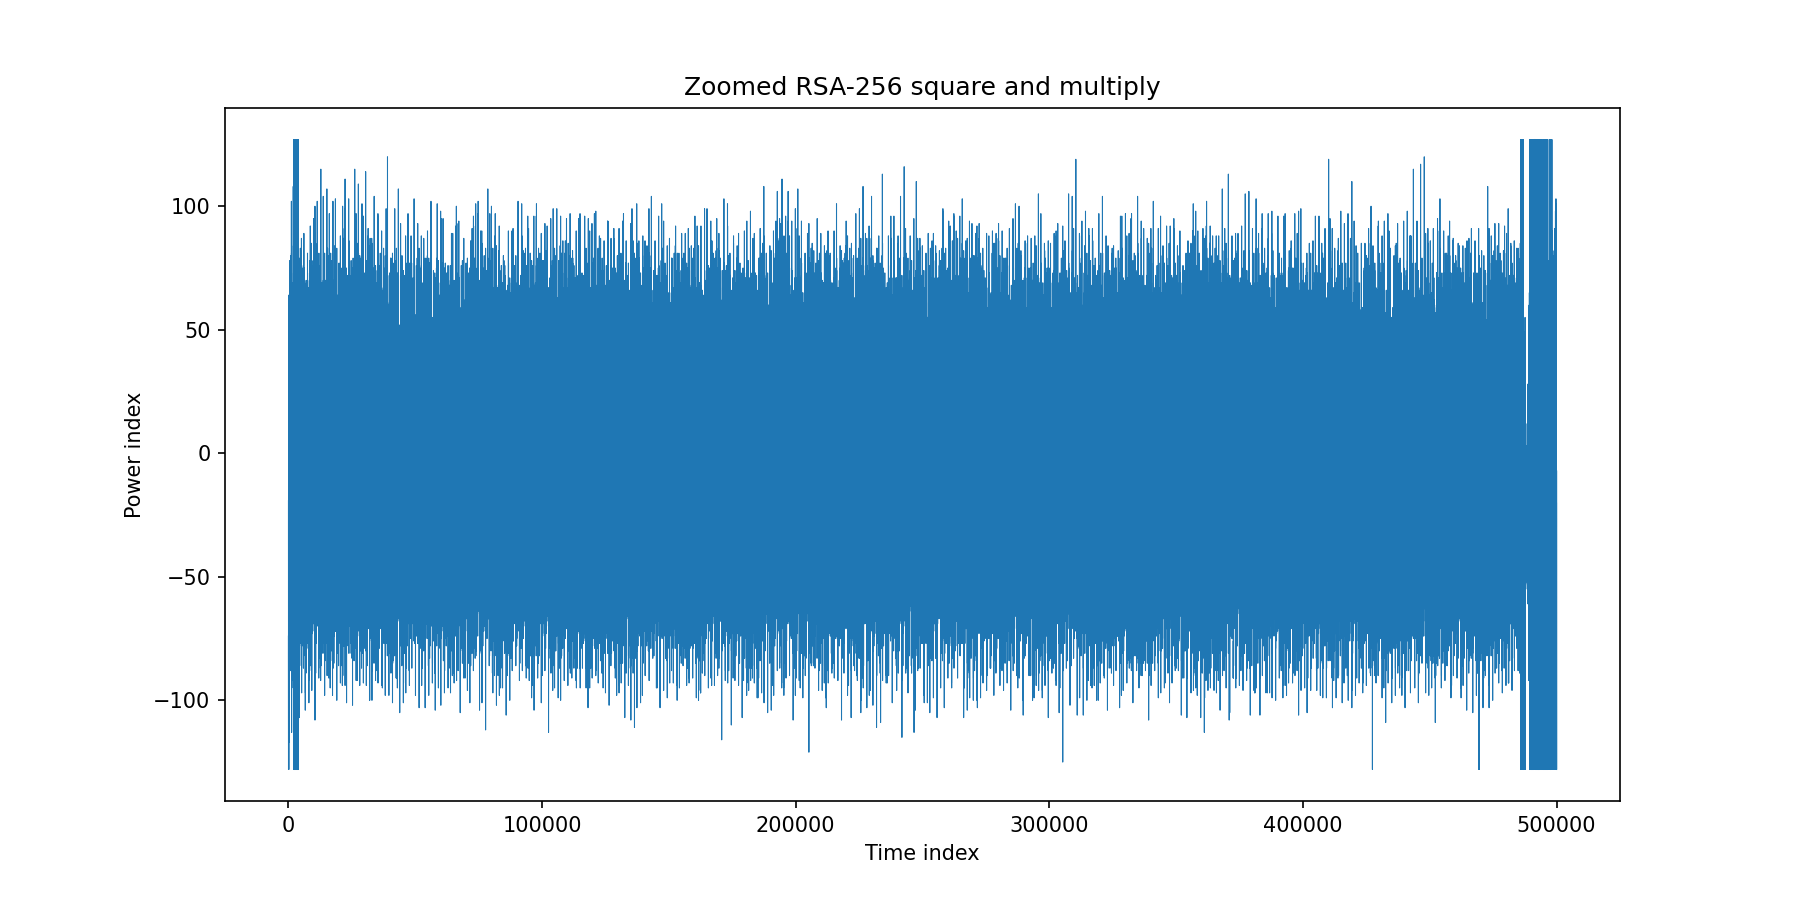

In [4]:
#This will plot a small part of the trace

plt.close('all')

plt.rcParams['figure.figsize'] = (12.0,6.0)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 0.5

plt.plot(trace)
plt.ylabel('Power index')
plt.xlabel('Time index')
plt.title('Zoomed RSA-256 square and multiply')

In [ ]:
d = PASTE YOUR FULL KEY HERE

c_to_decrypt = 20474202814704637850355872534654257277490929920838357343878293338096257382130

print(binascii.unhexlify(hex(pow(c_to_decrypt, d, N))[2:]) )